This is a demo for ICE problem:

First we start with D_ICEP, since it is a deterministic problem, we deal with it firstly.

Before data generation (nodes, resources and arcs), we have to set some parameters:
    

In [1]:
import generateSimpleData
import plotting
import runExpe


num_i = 1               # Number of potential resources for evacuation purpouses
num_a = 2               # Number of areas to be evacuated
num_b = 2               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 2               # Number of shelters where people is dropped off
num_h = 1               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 60          # Number of people per area
num_selfEva = 5         # Number of self evacuees (people that can safe themselfs)
numClas = 1             # Number of classes of rescue resources

Next, we can move on generating data:

In [2]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)

So now we can plot our evacuation base situation:
    - Red cross and green cross are start and sink node respectively 
    - Dark dotted arcs are just ideal 
    - Yellow nodes and yellow arcs are the initial resource location and the trip the resource have to take to reach an evacuation area
    - Blue nodes are evacuation areas and red dashed arcs represent population movements to pickUp points
    - Green nodes are pick-up points
    - Blue arcs represent the roads used by rescuers to reach shelters (red nodes) from pick-up points and back
    - Green dotted arcs represents people who can self evacuate the area with their own vehicles

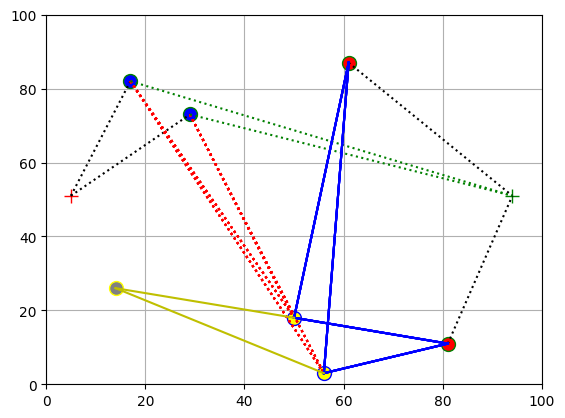

In [3]:
plotting = plotting.Plotting(data)
plotting.plotBase()
plotting.plotResourceArcs()

Now let's run our experiment:

In [4]:
status, runtime, objVal, experiment = runExpe.runExpe(data)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-16
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 202 rows, 114 columns and 459 nonzeros
Model fingerprint: 0x95fee79a
Variable types: 0 continuous, 114 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 132 rows and 15 columns
Presolve time: 0.00s
Presolved: 70 rows, 99 columns, 295 nonzeros
Variable types: 0 continuous, 99 integer (48 binary)

Root relaxation: objective 1.481933e+02, 65 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  148.19325    0    9          -  148.19325      -     -    0

0 0 0


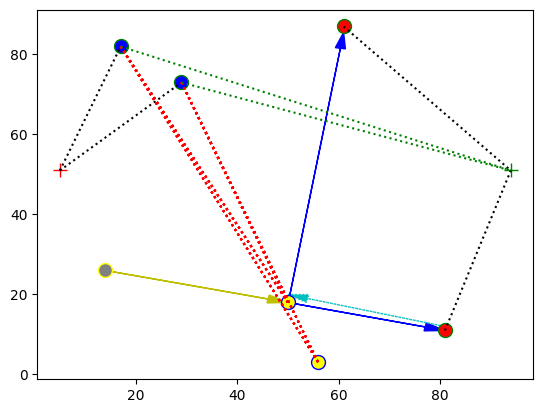

Solution found in  0.1900806427001953 seconds. Total rescue time:  183.0 unitTime


In [5]:

vars = experiment.getVars()
i = 0                               # Resource 1 index
k = 0                               # Trip 1 index
objValue = objVal
plotting.plotBase()                 # Plot base nodes and roads
plotting.plotZetaArc(vars, i)       # Plot arcs from initial locations to pickup poiunts
plotting.plotGammaArc(vars, i, k)   # Plot arcs from pickUp to shelters
plotting.plotDeltaArc(vars, i, k)   # Plot arcs from shelters back to pickUp points
plotting.plotGammaArc(vars, i, k+1) # Plot arcs from pickUp to shelters in the succesively trip
plotting.show()

print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "unitTime")

Now we can try to increase some parameters such as the number of resources, number of evacuation areas and pickup points, and also introduce vehicle type specific compatibility between resources and pick or drop points (Es. a ferry is not compatible with a parking lot).


In [6]:
num_i = 3               # Number of potential resources for evacuation purpouses
num_a = 3               # Number of areas to be evacuated
num_b = 3               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 2               # Number of shelters where people is dropped off
num_h = 2               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 100          # Number of people per area
num_selfEva = 5         # Number of self evacuees (people that can safe themselfs)
numClas = 2             # Number of classes of rescue resources

Then as before, we regenerate data, compute experiment and show results:

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2428 rows, 1504 columns and 7453 nonzeros
Model fingerprint: 0xd65bfbbf
Variable types: 0 continuous, 1504 integer (630 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 1884 rows and 564 columns
Presolve time: 0.01s
Presolved: 544 rows, 940 columns, 2854 nonzeros
Variable types: 0 continuous, 940 integer (426 binary)

Root relaxation: objective 3.365328e+02, 575 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  336.53284    0   71          -  336.53284      -     -    0s
     0     0  341.65060    0    3          -  341.65060      -     -    0s
H

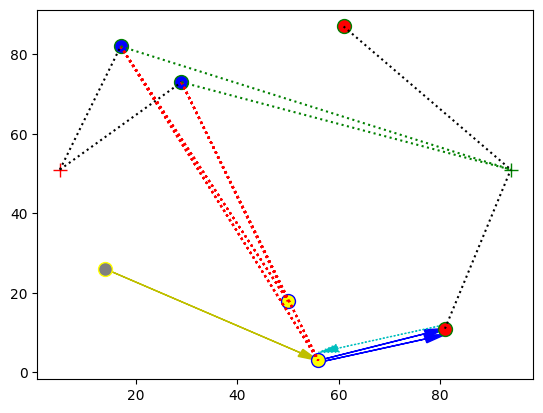

Solution found in  0.4732666015625 seconds. Total rescue time:  344.0 unitTime


In [7]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)
status, runtime, objVal, experiment = runExpe.runExpe(data)

vars = experiment.getVars()
i = 0                               # Resource 1 index
k = 0                               # Trip 1 index
objValue = objVal
plotting.plotBase()                 # Plot base nodes and roads
plotting.plotZetaArc(vars, i)       # Plot arcs from initial locations to pickup poiunts
plotting.plotGammaArc(vars, i, k)   # Plot arcs from pickUp to shelters
plotting.plotDeltaArc(vars, i, k)   # Plot arcs from shelters back to pickUp points
plotting.plotGammaArc(vars, i, k+1) # Plot arcs from pickUp to shelters in the succesively trip
plotting.show()

print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "unitTime")
